In [1]:
# Include parent directory in sys.path to import local modules
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

In [3]:
from src.io import load_from_hdf5, load_key_from_hdf5
import numpy as np
from matplotlib import pyplot as plt

## Setting the filename

In [15]:
dt = 0.1
p = 0.15
Nx = 3
Ny = 3
N = Nx*Ny
b = 0.0 #2/((Nx-1)*(Ny-1))  # Magnetic field strength
B = b*np.pi # Magnetic field in units of flux quantum
t = 0.0  # Diagonal hopping
num_iterations = 1000
steps = 200
site_in = 0  # Site where the current is injected
site_out = N-1  # Site where the current is extracted
drive_type = "current"  # "current", "dephasing"
corner_dephasing = False  # Whether to apply dephasing at the corners
initial_state = "random"  # "checkerboard", "empty", "random", "custom"


filename = f"../data/ff_{Nx}x{Ny}_dt{dt}_p{p}_B{B}_t{t}_steps{steps}_trajectories{num_iterations}_{drive_type}_{initial_state}.h5"

---
# Plotting Density Trace

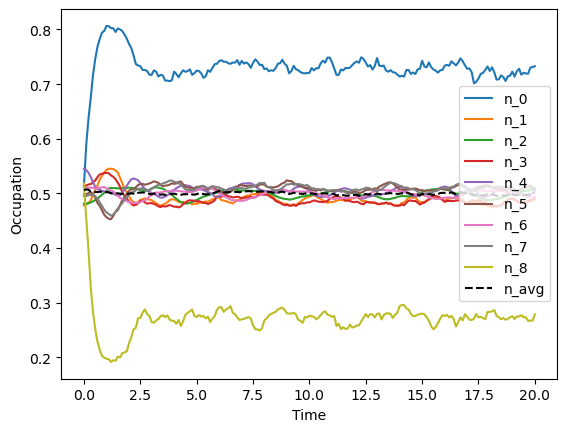

In [20]:
n_avg = load_key_from_hdf5(filename, "n_avg")
params = load_key_from_hdf5(filename, "params")
t_list = load_key_from_hdf5(filename, "t_list")

# Extract parameters
Nx = params['Nx']
Ny = params['Ny']
N = Nx * Ny


for i in range(N):
    plt.plot(t_list, n_avg[:,i], label=f"n_{i}")
plt.plot(t_list, np.sum(n_avg, axis=1)/N, '--', c='k', label="n_avg")
plt.xlabel("Time")
plt.ylabel("Occupation")
plt.legend()
# plt.xscale("log")
plt.show()

In [17]:
params

{'Nx': np.int64(3),
 'Ny': np.int64(3),
 'bonds': array([[1, 2],
        [3, 4],
        [4, 5],
        [6, 7],
        [3, 6],
        [1, 4],
        [4, 7],
        [2, 5]]),
 'corner_dephasing': np.False_,
 'drive_type': 'current',
 'initial_state': 'random',
 'p': np.float64(0.15),
 'site_in': np.int64(0),
 'site_out': np.int64(8),
 'steps': np.int64(200)}